### After clean the Car now i have decied to use Linear Regression for the prediction.

So for use that i have to make some assumtion and make them true so it can give me support fot use the Linear Regression.

Because I know that Linear Regression algorith only work when the relation with features with the target column is linear.

I don't need to focus the categorical columns because those will be converted as dummies variable. 

all I have problem with numerical columns. like `Mileage`, `EngineV`, and `Year`

In [1]:
# importing relevent library
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [2]:
# loading the data
car = pd.read_csv('C:/Users/sandi/OneDrive/Car csv/Car_cleaned.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


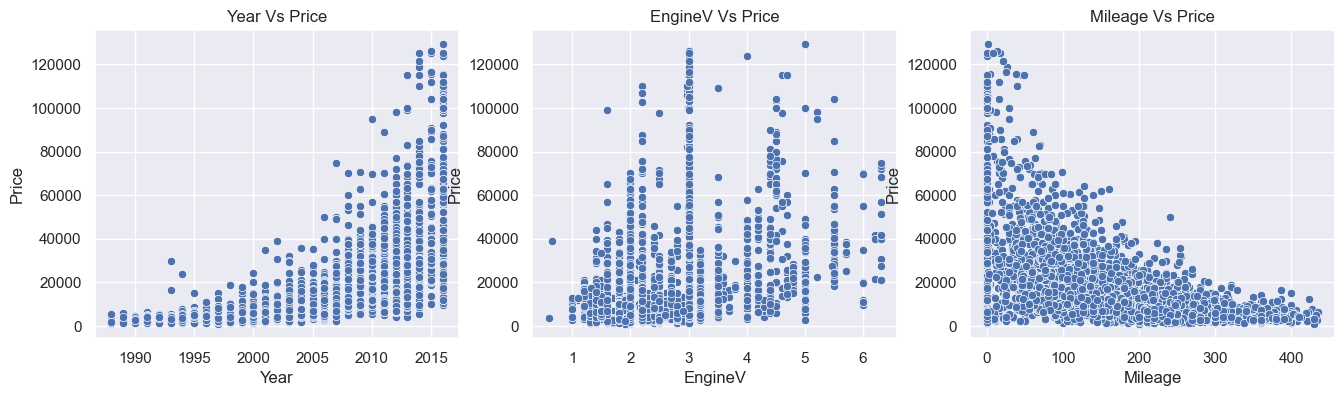

In [3]:
# plotting all the three numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['Price']);
plt.title('Year Vs Price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['Price']);
plt.title('EngineV Vs Price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['Price']);
plt.title('Mileage Vs Price');


#### Now I can see that the relation is anything but not linear. I can not run `Linear Regression` in here.

We have to transform these column

Text(0.5, 1.0, 'Price')

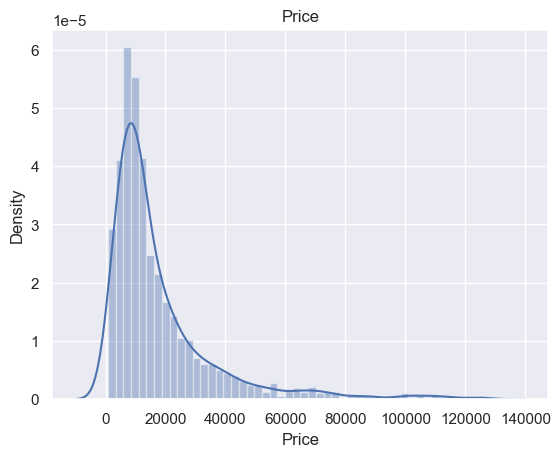

In [4]:
## Checking the price
sns.distplot(car['Price']);
plt.title('Price')

The problem lies with the price, the price we have in the data is not linear.

Common approch form many others to transform the data is `log transformation`.

`Numpy` has a methode which calculate natural log which is `np.log(x)` it return natural logarithm of a number or arrays.

In [5]:
# transfor the price
log_price = np.log(car['Price'])

# adding another column 
car['log_price'] = log_price

# checking the data again
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


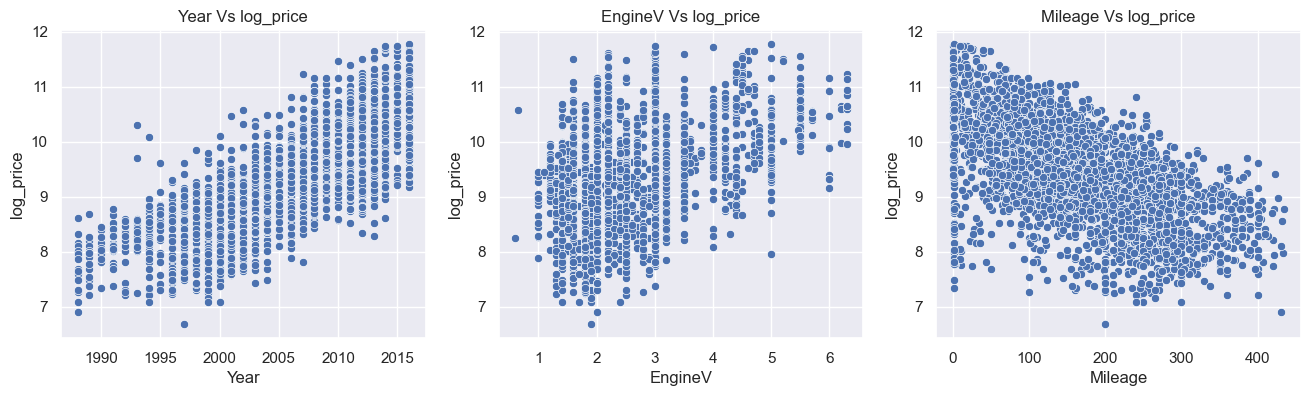

In [6]:
# plotting all the three numerical columns again with log price
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']);
plt.title('Year Vs log_price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']);
plt.title('EngineV Vs log_price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']);
plt.title('Mileage Vs log_price');

#### Now whole picture change. 
Here we can obserbeve the linearity of the data with Price column

In [7]:
# droping the Original price column that is no longer needed
car.drop('Price', axis=1, inplace=True)

Up to Now 

* The data have linar relation with target column.
* The is almost normally distributed, that is I take care in previous car cleaning process by taking 99th percentile.


### Now check the Multicollinearity.

this is oocure when the feature of the data is corealeted with other feature.

In [8]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

There can be some multicollinearity in the data that can be assumed like the newer the car will be mileage will be lower. so `Year` and `Milage` will be correleated.

I will use the VIF or Variance inflation factor to check the multicolinearity.

The VIF produce a measure which estimate how much larger the square root of the standerd error of the estimate is compared to a situation wher the variable was completely uncorreleated with other features.


In [9]:
# import VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# taking only numerical column beacuse the categorical will be converted as dummy variable
var = car[['Mileage', 'Year', 'EngineV']]
# var become a dataframe with oly three columns


# craating a dataframe
vif_df = pd.DataFrame()

# adding column
vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['features'] = var.columns

# checking the result
vif_df

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Now here how it works.

When there is result `1` that means there is no multicolinearity this is also the minimum value of the measure. but it has no upper limit.

Generaly the values are between `1 to 5` or `1< VIF < 5` are consider ok, but it is depend on the problem on hand and the devoloper. he/she will decied the cut-off value from his past experience.

From the result i have got look like the `Year` column is too much corelated with other column. and it will down others feature values. it will be good to drop down the year. column

This [article](https://statisticalhorizons.com/multicollinearity) has more about it.

In [10]:
# deop the year
car.drop('Year', axis=1, inplace=True)

car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Now taking care about categorical columns

`Brand`, `Body`, `Engine Type` and `Registration`

In [11]:
# checking the datatypes 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


I will use `pandas` `.get_dummies()` methode for this it will create a new column for all the categorical values. it will increase the dimention of the data.

In [12]:
car_dum = pd.get_dummies(car, drop_first=True) 

# checking the data
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [13]:
# print(car_dum.dtypes)
car_dum = car_dum.astype(int)
print(car_dum.dtypes)
car_dum = car_dum.loc[:, car_dum.nunique() > 1]
print(car_dum.nunique())




Mileage                int64
EngineV                int64
log_price              int64
Brand_BMW              int64
Brand_Mercedes-Benz    int64
Brand_Mitsubishi       int64
Brand_Renault          int64
Brand_Toyota           int64
Brand_Volkswagen       int64
Body_hatch             int64
Body_other             int64
Body_sedan             int64
Body_vagon             int64
Body_van               int64
Engine Type_Gas        int64
Engine Type_Other      int64
Engine Type_Petrol     int64
Registration_yes       int64
dtype: object
Mileage                377
EngineV                  7
log_price                6
Brand_BMW                2
Brand_Mercedes-Benz      2
Brand_Mitsubishi         2
Brand_Renault            2
Brand_Toyota             2
Brand_Volkswagen         2
Body_hatch               2
Body_other               2
Body_sedan               2
Body_vagon               2
Body_van                 2
Engine Type_Gas          2
Engine Type_Other        2
Engine Type_Petrol       2
Regis

In [14]:
# # Checking the Multicolinearity for all coumns
# # craating a dataframe
# vif_df_all = pd.DataFrame()

# # adding column
# vif_df_all['VIF'] = [vif(car_dum.values, i) for i in range(car_dum.shape[1])]
# vif_df_all['features'] = car_dum.columns

# # checking the result
# vif_df_all

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df_all = pd.DataFrame()
vif_df_all['VIF'] = [variance_inflation_factor(car_dum.values.astype(float), i) for i in range(car_dum.shape[1])]
vif_df_all['features'] = car_dum.columns

print(vif_df_all)



          VIF             features
0    4.329869              Mileage
1    9.201656              EngineV
2   36.216259            log_price
3    2.591939            Brand_BMW
4    3.058590  Brand_Mercedes-Benz
5    1.812116     Brand_Mitsubishi
6    2.283204        Brand_Renault
7    2.401559         Brand_Toyota
8    3.308884     Brand_Volkswagen
9    1.590091           Body_hatch
10   1.608168           Body_other
11   3.524642           Body_sedan
12   1.828932           Body_vagon
13   2.619043             Body_van
14   1.693731      Engine Type_Gas
15   1.081151    Engine Type_Other
16   2.470202   Engine Type_Petrol
17  14.979720     Registration_yes


This is very good result.
all the values are under 5 but the `log_price` or our target column have `42` VIF value, that is telling us the price is highely 
corellated with other column, and this is very good sign.

#### Reaange the column

In [15]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [16]:
# creating new arranged column
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

# creating new data frame
car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9,163,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9,35,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11,9,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
# saving the last preprocces data in csv file for model creating
car_pos.to_csv('C:/Users/sandi/OneDrive/Car csv/Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


In [18]:
### Here the data preprocessing and EDA is over.
